# Problem Statement
The problem revolves around understanding and predicting graduate admissions. Company aims to enhance its services by analyzing critical factors influencing admissions and leveraging these insights to build a predictive model. The dataset provided will be central to this task.

# Core Challenges
- **Factor Identification:** Determine which variables significantly influence graduate admissions.
- **Interrelationship Analysis:** Understand how these variables interact with each other.
- **Predictive Accuracy:** Construct a robust model to predict admission probabilities, especially tailored to Indian applicants.

In [192]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [193]:
df=pd.read_csv('data.csv')
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


In [194]:
df.shape

(500, 9)

There are 500 rows and 9 columns

In [195]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [196]:
df.isnull().sum()

,0
Serial No.,0
GRE Score,0
TOEFL Score,0
University Rating,0
SOP,0
LOR,0
CGPA,0
Research,0
Chance of Admit,0


It looks like there are no null values

# Dataset Exploration

In [197]:
df.keys()

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [198]:
for i in df.keys():
    print(f'Column name: {i} and it contains \n {df[i].value_counts()}\n\n')

Column name: Serial No. and it contains 
 Serial No.
1      1
330    1
343    1
342    1
341    1
      ..
162    1
161    1
160    1
159    1
500    1
Name: count, Length: 500, dtype: int64


Column name: GRE Score and it contains 
 GRE Score
312    24
324    23
316    18
321    17
322    17
327    17
311    16
320    16
314    16
317    15
325    15
315    13
308    13
323    13
326    12
319    12
313    12
304    12
300    12
318    12
305    11
301    11
310    11
307    10
329    10
299    10
298    10
331     9
340     9
328     9
309     9
334     8
332     8
330     8
306     7
302     7
297     6
296     5
295     5
336     5
303     5
338     4
335     4
333     4
339     3
337     2
290     2
294     2
293     1
Name: count, dtype: int64


Column name: TOEFL Score and it contains 
 TOEFL Score
110    44
105    37
104    29
107    28
106    28
112    28
103    25
100    24
102    24
99     23
101    20
111    20
108    19
113    19
109    19
114    18
116    16
115    11
118

#### Column details:
- **Serial No.:** This column represents the unique row identifier for each applicant in the
dataset.
- **GRE Scores:** This column contains the GRE (Graduate Record Examination) scores of the applicants, which are measured on a scale of 0 to 340.
- **TOEFL Scores:** This column includes the TOEFL (Test of English as a Foreign Language) scores of the applicants, which are measured on a scale of 0 to 120.
- **University Rating:** This column indicates the rating or reputation of the university that the applicants are associated with.
    - The rating is based on a scale of 0 to 5, with 5 representing the highest rating.
- **SOP:** This column represents the strength of the applicant's statement of purpose, rated on a scale of 0 to 5, with 5 indicating a strong and compelling SOP.
- **LOR:** This column represents the strength of the applicant's letter of recommendation, rated on a scale of 0 to 5, with 5 indicating a strong and compelling LOR.
- **CGPA:** This column contains the undergraduate Grade Point Average (GPA) of the applicants, which is measured on a scale of 0 to 10.
- **Research:** This column indicates whether the applicant has research experience (1) or not (0).
- **Chance of Admit:** This column represents the estimated probability or chance of admission for each applicant, ranging from 0 to 1.

In [199]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [200]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


#### Column-Wise Analysis
- GRE Score
    - Mean: 316.47, Std: 11.3
    - The majority of scores (middle 50%) fall between 308 (25th percentile) and 325 (75th percentile), showing a strong central tendency around competitive GRE scores.
    - The range (290 to 340) suggests no extreme outliers.
- TOEFL Score
    - Mean: 107.19, Std: 6.08
    - Scores are tightly clustered around the mean, with most falling between 103 and 112.
    - The minimum score of 92 indicates a few weaker applicants, while the maximum of 120 represents a perfect TOEFL score.
- University Rating
    - Mean: 3.11, Std: 1.14
    - Ratings are evenly distributed, with many universities rated between 2 and 4. Few universities have the highest rating of 5 or the lowest rating of 1.
- SOP (Statement of Purpose) and LOR (Letter of Recommendation Strength)
    - Means: 3.37 (SOP) and 3.48 (LOR), Std: ~1.0
    - Both have similar distributions, with the majority rated 3 or higher.
    - SOP and LOR ratings of 1 are rare, indicating most applicants have reasonably strong submissions.
- CGPA
    - Mean: 8.58, Std: 0.6
    - CGPA scores are tightly clustered, with most falling between 8.13 and 9.04. This high average reflects a competitive applicant pool.
    - The maximum value of 9.92 indicates exceptionally strong academic profiles.
- Research
    - Mean: 0.56, Std: 0.49
    - ~56% of applicants have research experience. This binary variable is well-balanced and likely impactful for predictive modeling.
- Chance of Admit
    - Mean: 0.72, Std: 0.14
    - The majority of applicants have an admission probability between 0.63 and 0.82 (middle 50%).
    - A minimum of 0.34 suggests the inclusion of lower-probability applicants, while a maximum of 0.97 indicates highly competitive profiles.

#### General Insights
- Highly Competitive Dataset:
    - The applicant pool is strong, with high GRE, TOEFL, CGPA, and SOP/LOR ratings.
- Importance of Research:
    - With 56% having research experience, this feature could act as a strong differentiator.
- Predictive Modeling Considerations:
    - GRE Score, TOEFL Score, CGPA, University Rating, and Research are likely to be strong predictors of Chance of Admit.
    - Normalizing or scaling features like GRE, TOEFL, and CGPA will help ensure that all variables contribute equally to model performance.
- Strategic Recommendations:
    - Company can emphasize the importance of strong SOPs and LORs, as the data shows high ratings in these areas.
    - Targeting research experience and improving TOEFL/GRE thresholds may be key for borderline applicants to improve their profiles.

#### Additional Insights
- **Test Scores Analysis:** Focus on GRE and TOEFL scores, as they are crucial for Ivy League admissions. Analyze thresholds and determine the minimum scores for higher admission probabilities.
- **Academic Background:** Rely on CGPA as a proxy for the applicant's academic strength. Examine its relationship with admission chances, particularly for competitive universities.
- **Qualitative Evaluation:** Utilize SOP and LOR ratings to assess their impact on admission likelihood, focusing on how these components can strengthen an application when combined with solid test scores.
- **Research Experience:** Investigate the influence of research experience (binary feature) on admissions. Highlight its importance in differentiating applicants with similar academic profiles.
- **Feature Engineering:** Create derived metrics such as a weighted score combining GRE, TOEFL, and CGPA, or interaction terms like GRE × Research to improve model interpretability and predictive accuracy.
- **Model Validation:** Employ cross-validation techniques to ensure that the predictive model performs consistently and generalizes well across various subsets of the dataset.

#### Strategic Impact
**For Company:** <br>
- **Data-Driven Services:** Use GRE, TOEFL, CGPA, SOP, and LOR insights to create a predictive admission tool for the website, enhancing its utility and user experience.
- **Student Preparation Strategy:** Tailor guidance programs to help students strengthen weaker areas, such as improving SOP quality or targeting specific GRE/TOEFL score ranges.<br><br>

**For Students:** <br>
- **Transparent Insights:** Provide clear predictions about admission chances based on the dataset's quantifiable factors, helping students set realistic expectations.
- **Focused Improvement Areas:** Offer practical recommendations to improve their profiles, such as emphasizing research experience or targeting GRE score improvements.

In [201]:
df.duplicated().sum()

0

There are no duplicated rows in the dataset

- there is a categorical columns: Research (but it is in boolean format)
- there are ordinal columns: University Rating, SOP, LOR
- there are numerical columns: GRE Score, TOEFL Score, Chance of Admit

We can drop the column: Serial No., as it is not adding any value to our business case study

In [202]:
df = df.drop(columns=['Serial No.'])

In [203]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


# Univariate Analysis

In [204]:
df.Research.value_counts()

,count
Research,
1,280
0,220


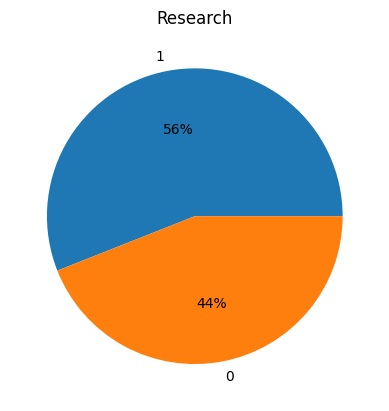

In [205]:
plt.pie(df.Research.value_counts(), labels=df.Research.value_counts().index, autopct='%.0f%%')
plt.title('Research');

- 56% of applicants have research experience, which suggests that research is a relatively common qualification among the applicant pool.

In [206]:
df['University Rating'].value_counts()

,count
University Rating,
3,162
2,126
4,105
5,73
1,34


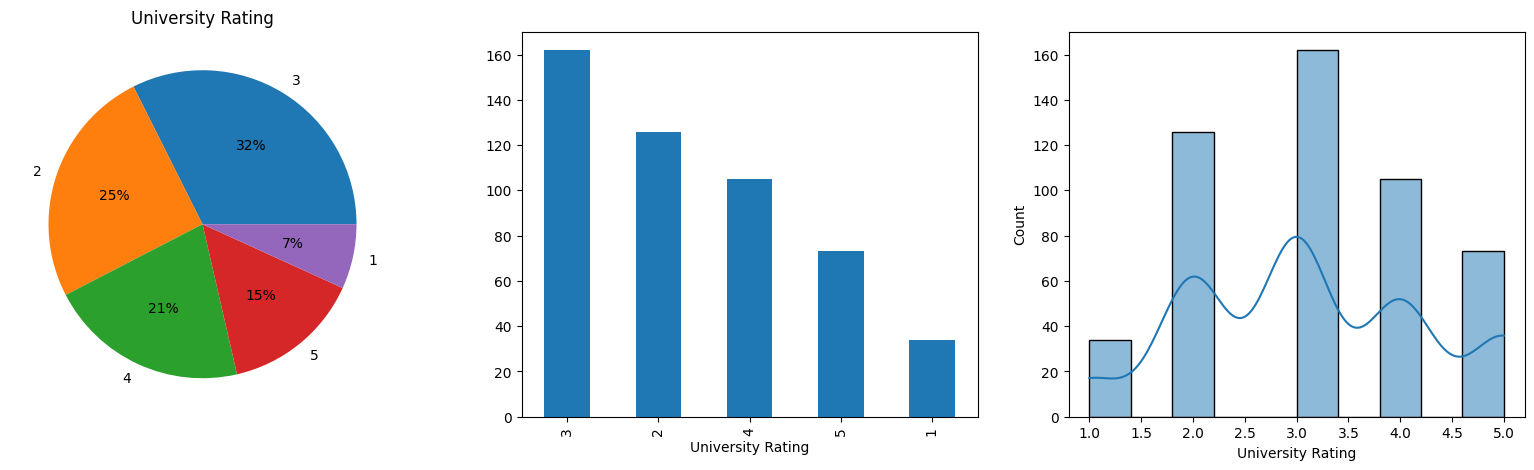

In [207]:
plt.figure(figsize=(20, 5))
plt.subplot(1, 3, 1)
plt.pie(df['University Rating'].value_counts(), labels=df['University Rating'].value_counts().index, autopct='%.0f%%')
plt.title('University Rating')
plt.subplot(1, 3, 2)
df['University Rating'].value_counts().plot(kind='bar')
plt.subplot(1, 3, 3)
sns.histplot(df['University Rating'], kde=True);

- Rating 3 is the most frequent university rating, accounting for over 32% of applicants. This indicates a substantial portion of applicants come from moderately ranked universities.
- Ratings 2, 3, and 4 dominate, collectively representing around 78.6% of the dataset.
- Relatively fewer applicants are associated with highly rated universities (Rating 5) or the lowest-rated ones (Rating 1).
- Only 7% of applicants come from universities with the lowest rating (1).
- Similarly, only 15% come from the highest-rated universities (5). This may reflect the competitive nature of Ivy League admissions, where mid-range institutions are the majority.

In [208]:
df.SOP.value_counts()

,count
SOP,
4.0,89
3.5,88
3.0,80
2.5,64
4.5,63
2.0,43
5.0,42
1.5,25
1.0,6


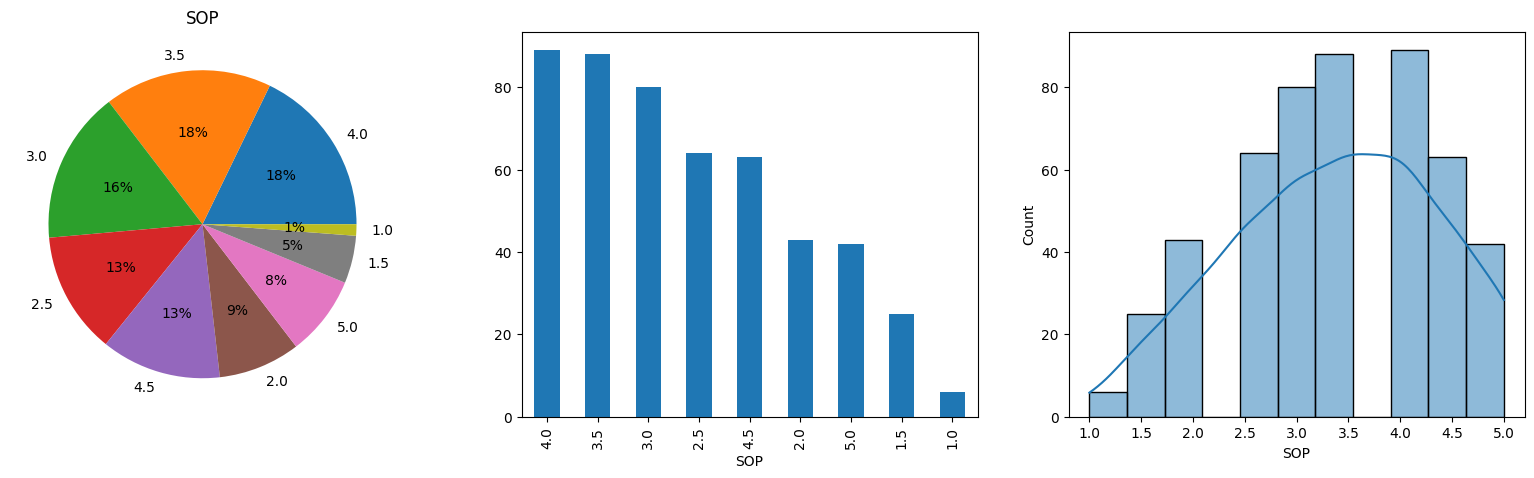

In [209]:
plt.figure(figsize=(20, 5))
plt.subplot(1, 3, 1)
plt.pie(df['SOP'].value_counts(), labels=df['SOP'].value_counts().index, autopct='%.0f%%')
plt.title('SOP')
plt.subplot(1, 3, 2)
df['SOP'].value_counts().plot(kind='bar')
plt.subplot(1, 3, 3)
sns.histplot(df.SOP, kde=True);

- The majority of applicants have an SOP score in the range of 3.0 to 4.5 (cumulatively 64%).
- SOP ratings of 4.0 (17.8%) and 3.5 (17.6%) are the most frequent, suggesting many applicants aim for moderately strong statements.
- The data is slightly skewed toward higher SOP scores, with 42.4% of applicants scoring 4.0 or higher.
- Only 6.2% of applicants have weak SOPs (scores of 1.0 or 1.5).
- Very few applicants (1.2%) have the lowest SOP score (1.0), indicating that most applicants recognize the importance of a strong SOP for admissions.

In [210]:
df['LOR '].value_counts()

,count
LOR,
3.0,99
4.0,94
3.5,86
4.5,63
2.5,50
5.0,50
2.0,46
1.5,11
1.0,1


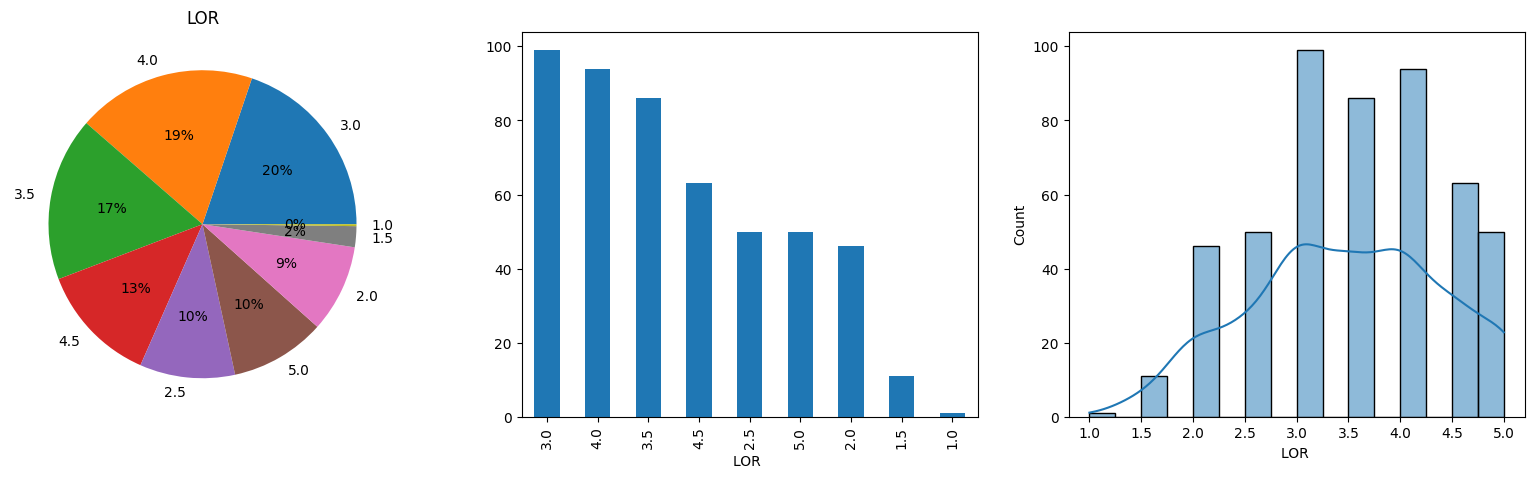

In [211]:
plt.figure(figsize=(20, 5))
plt.subplot(1, 3, 1)
plt.pie(df['LOR '].value_counts(), labels=df['LOR '].value_counts().index, autopct='%.0f%%')
plt.title('LOR')
plt.subplot(1, 3, 2)
df['LOR '].value_counts().plot(kind='bar')
plt.subplot(1, 3, 3)
sns.histplot(df['LOR '], kde=True);

- The most frequent ratings are 3.0 (19.8%) and 4.0 (18.8%), indicating that most applicants have moderately strong letters of recommendation.
- A high number of applicants have 3.0–4.5 ratings, showing that recommendation letters tend to be fairly good but not necessarily outstanding.
- A significant portion of applicants (56.2%) have LORs rated 3.0 or higher.
- Only a small fraction (0.4%) has the lowest possible LOR score (1.0), suggesting that the majority of applicants do not submit extremely weak recommendation letters.
- Very few applicants have 1.0 or 1.5 LORs (only 2.4% combined), implying that a poorly rated LOR is rare among this dataset.
- Only 2% of applicants have the highest LOR score (5.0), indicating that strong letters are not as common as moderately strong ones.

In [212]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


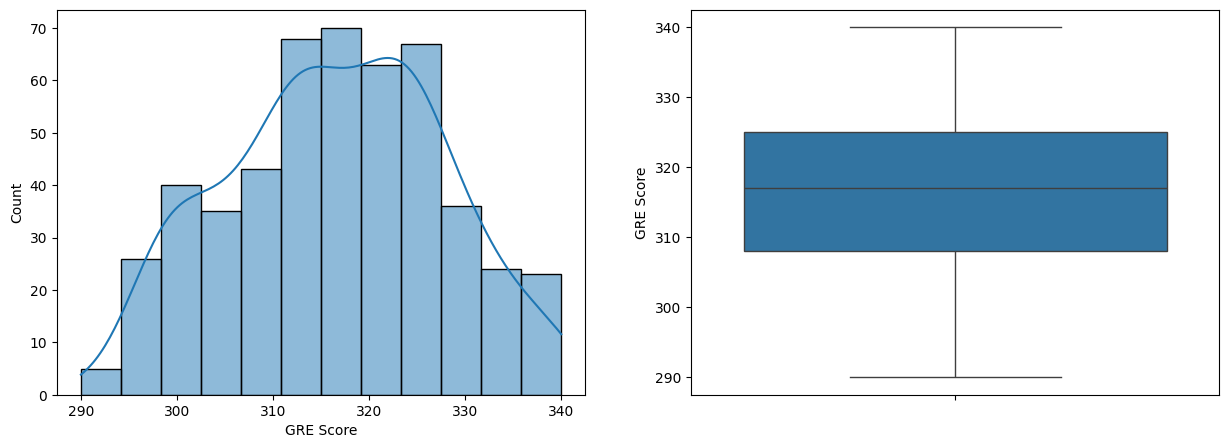

In [213]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['GRE Score'], kde=True)
plt.subplot(1, 2, 2)
sns.boxplot(df['GRE Score']);

- The histogram indicates a bell-shaped, roughly normal distribution of GRE scores, with the highest frequency around 310-320. The IQR (Interquartile Range) spans from about 300 to 320, indicating that 50% of the applicants scored within this range.
- The scores range from about 290 to 340, with most of the data falling between 300 and 330.
- There are few scores at the extremes (290 and 340), indicating that most applicants have moderate to high GRE scores. The whiskers extend from about 290 to 340, with no significant outliers beyond this range.
- The mode, or peak, of the distribution is around 320, suggesting that the majority of applicants in the dataset scored in this range.
- The distribution appears to be symmetrical, with no significant skew, as both the left and right sides of the histogram are relatively balanced.
- The absence of points outside the whiskers confirms that the distribution is not skewed by extreme outliers.

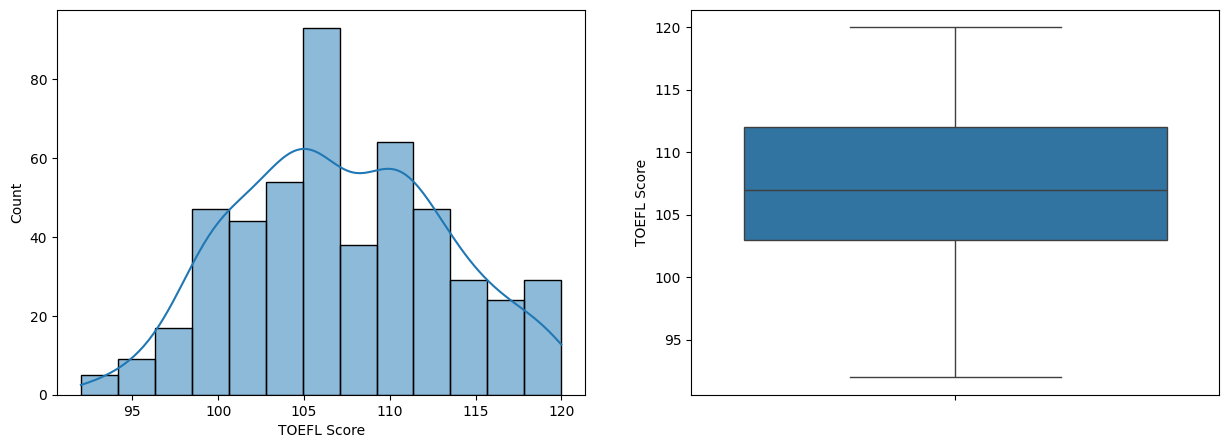

In [214]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['TOEFL Score'], kde=True)
plt.subplot(1, 2, 2)
sns.boxplot(df['TOEFL Score']);

- The histogram displays a bell-shaped distribution, which closely resembles a normal distribution.
- The median TOEFL score is around 105, as indicated by the line inside the box.
- The IQR (Interquartile Range) spans from about 100 to 110, indicating that 50% of the applicants scored within this range.
- The TOEFL scores range from about 95 to 120, with the majority of applicants scoring between 100 and 110.
- A few applicants have scores above 110, but these scores are less frequent.
- The mode, or peak of the distribution, is around 105, meaning most applicants scored within this range.
- The distribution is approximately symmetrical, with a slight tendency towards higher scores. However, the curve remains relatively balanced, indicating minimal skew.
- The whiskers extend from about 95 to 120, indicating that the range of scores is consistent with the histogram.
- There are no significant outliers beyond the whiskers, suggesting that the TOEFL scores are relatively consistent.

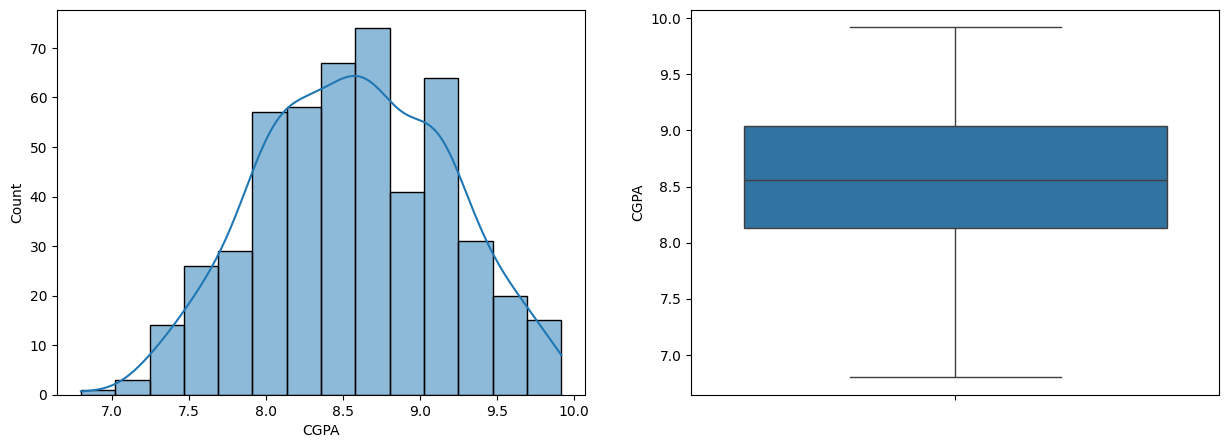

In [215]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['CGPA'], kde=True)
plt.subplot(1, 2, 2)
sns.boxplot(df['CGPA']);

- The histogram shows a bell-shaped distribution, resembling a normal distribution.
- The KDE curve supports this, peaking around 8.5 CGPA, indicating that most applicants have CGPA values near this score.
- The CGPA scores range from 7.0 to 10.0, with the majority of applicants scoring between 8.0 and 9.5.
- The distribution is somewhat symmetrical, though it has a slight rightward skew with fewer applicants achieving the maximum CGPA of 10.0.
- The mode of the distribution is around 8.5, meaning the majority of applicants have CGPAs around this value.
- The distribution is slightly right-skewed, as there are fewer applicants with CGPAs in the higher range (closer to 10).
- The median CGPA is around 8.7, as indicated by the line inside the box.
- The IQR (Interquartile Range) spans from about 8.0 to 9.2, meaning that 50% of the applicants scored within this range.
- The whiskers extend from around 7.0 to 10.0, indicating a relatively wide spread of scores.
- There are no significant outliers beyond the whiskers, suggesting that the CGPA scores are fairly consistent among applicants.

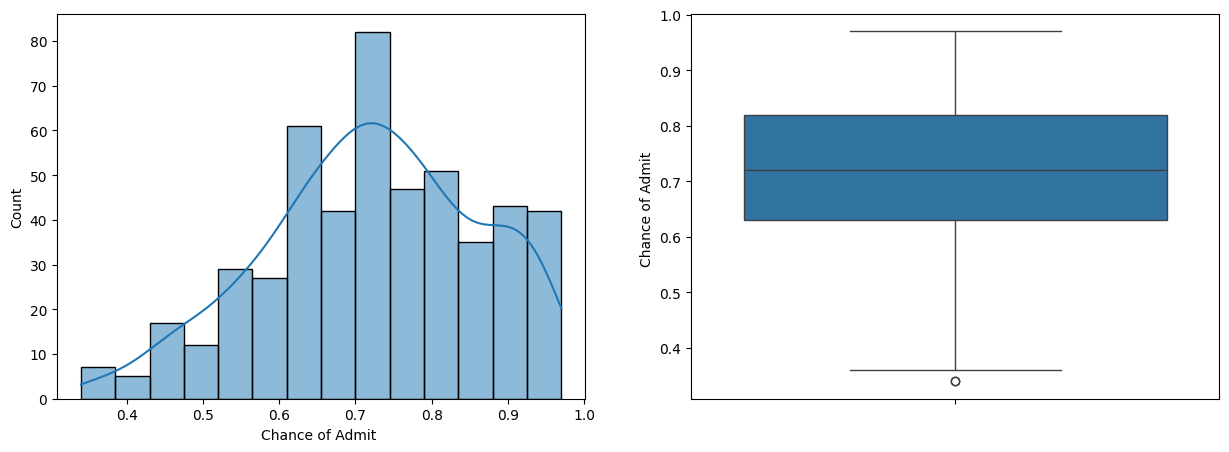

In [216]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['Chance of Admit '], kde=True)
plt.subplot(1, 2, 2)
sns.boxplot(df['Chance of Admit ']);

- Most applicants have a "Chance of Admit" between 0.6 and 0.9, with a peak around 0.7 to 0.8.
- The median "Chance of Admit" is around 0.75, and the majority of the data falls between 0.7 and 0.85.
- The presence of an outlier suggests that there are a few applicants with a significantly lower chance of admission compared to the rest.
- The distribution is slightly right-skewed, meaning there are more applicants with a higher "Chance of Admit" than lower.
- The distribution does not appear to have heavy tails, indicating a relatively normal distribution with a slight skew.

In [217]:
Q1 = df['Chance of Admit '].quantile(0.25)
Q3 = df['Chance of Admit '].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
lower_bound

0.3450000000000001

In [218]:
df=df[df['Chance of Admit ']>lower_bound]
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


**We know that our target variable/feature is 'Chance of Admit' so lets find out relationship between target and rest of the available features**

# Bivariate Analysis

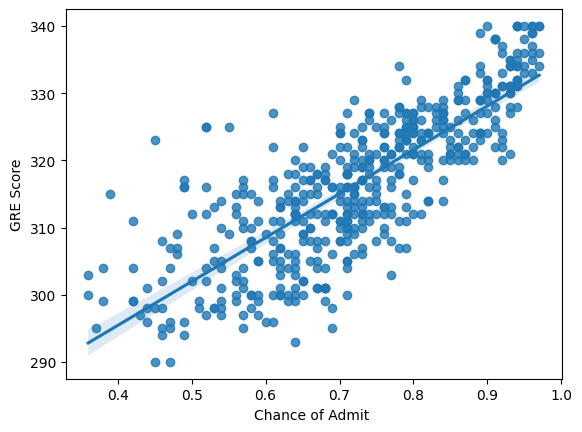

In [219]:
sns.regplot(data=df, x='Chance of Admit ', y='GRE Score');

- The scatter plot indicates a positive correlation between GRE scores and the chance of admission. As the GRE score increases, the chance of admission also tends to increase.
- The trend line in the scatter plot reinforces the positive correlation. It shows a clear upward trend, suggesting that higher GRE scores are generally associated with a higher chance of admission.
- The data points are spread across the plot, with most points concentrated in the middle range of GRE scores (around 300 to 330) and chance of admission (around 0.6 to 0.9). There are fewer data points at the extremes, indicating that very low or very high GRE scores are less common.
- There are a few outliers where applicants with lower GRE scores have a higher chance of admission and vice versa. These outliers could be due to other factors influencing the admission decision, such as strong SOPs, LORs, or research experience.

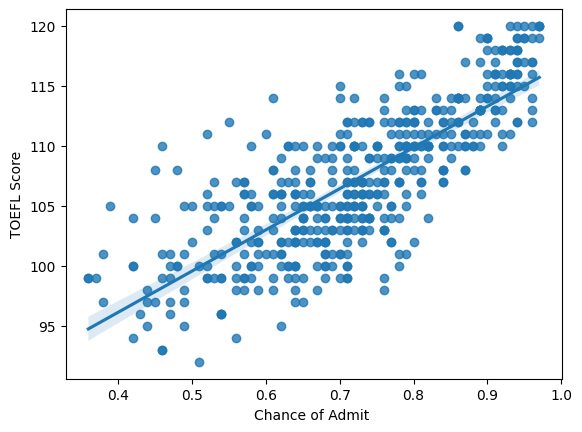

In [220]:
sns.regplot(data=df, x='Chance of Admit ', y='TOEFL Score');

- The scatter plot indicates a positive correlation between TOEFL scores and the chance of admission. As the TOEFL score increases, the chance of admission also tends to increase.
- The trend line in the scatter plot reinforces the positive correlation. It shows a clear upward trend, suggesting that higher TOEFL scores are generally associated with a higher chance of admission.
- The data points are spread across the plot, with most points concentrated in the middle range of TOEFL scores (around 100 to 115) and chance of admission (around 0.6 to 0.9). There are fewer data points at the extremes, indicating that very low or very high TOEFL scores are less common.

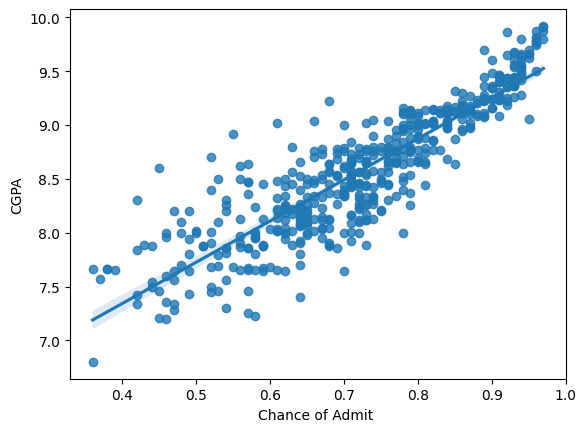

In [221]:
sns.regplot(data=df, x='Chance of Admit ', y='CGPA');

- The scatter plot indicates a positive correlation between CGPA and the chance of admission. As the CGPA increases, the chance of admission also tends to increase.
- The data points are spread across the plot, with most points concentrated in the middle range of CGPA scores (around 8.0 to 9.5) and chance of admission (around 0.6 to 0.9).

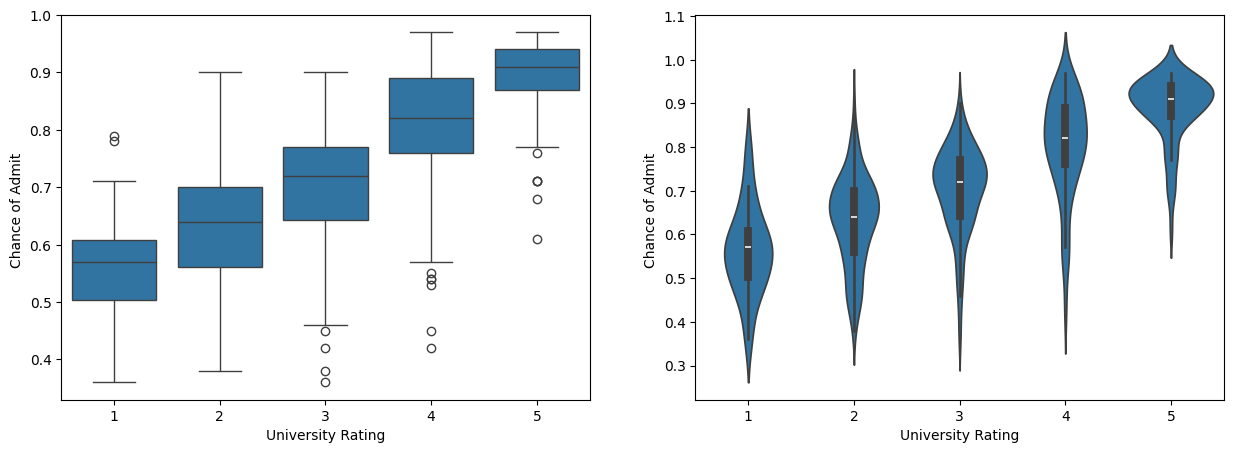

In [222]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.boxplot(x='University Rating', y='Chance of Admit ', data=df)
plt.subplot(1, 2, 2)
sns.violinplot(x='University Rating', y='Chance of Admit ', data=df);

- Higher University Ratings correspond to higher chances of admission.
- Higher university ratings have a more concentrated distribution, indicating a higher and more consistent chance of admission.
- University Rating 5 has the highest median chance of admission, followed by ratings 4, 3, 2, and 1.
- There are more outliers in the lower university ratings, indicating more variability in the chance of admission.
- The distribution of the chance of admission is more spread out for lower university ratings.
- The median chance of admission increases with the university rating, similar to the box plot.

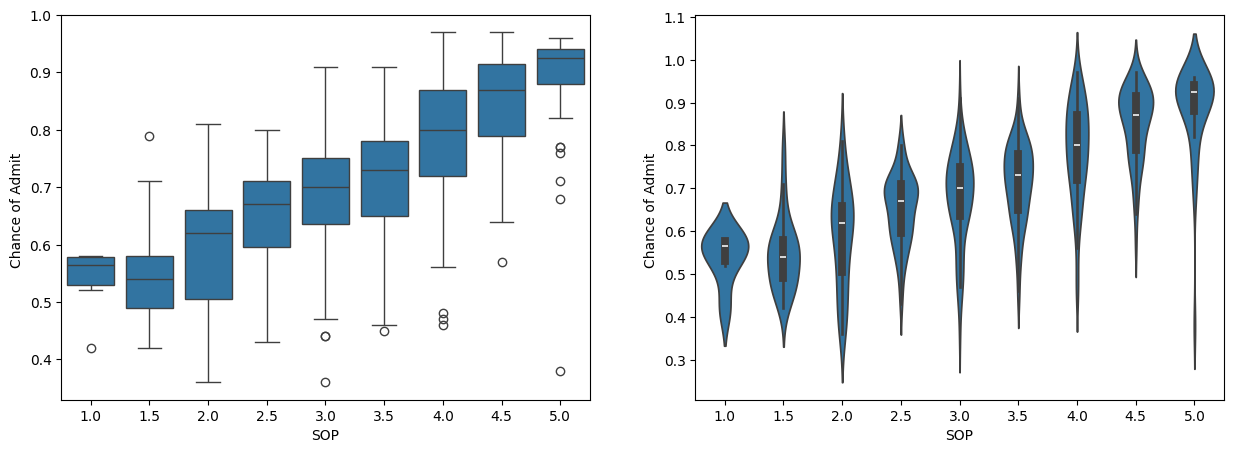

In [223]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.boxplot(x='SOP', y='Chance of Admit ', data=df)
plt.subplot(1, 2, 2)
sns.violinplot(x='SOP', y='Chance of Admit ', data=df);

- Higher SOP Scores correspond to higher chances of admission.
- Higher SOP scores have a more concentrated distribution, indicating a higher and more consistent chance of admission.
- SOP scores of 5.0 have the highest median chance of admission, followed by scores of 4.0, 3.0, 2.0, and 1.0.
- There are more outliers in the lower SOP scores, indicating more variability in the chance of admission.
- The distribution of the chance of admission is more spread out for lower SOP scores.

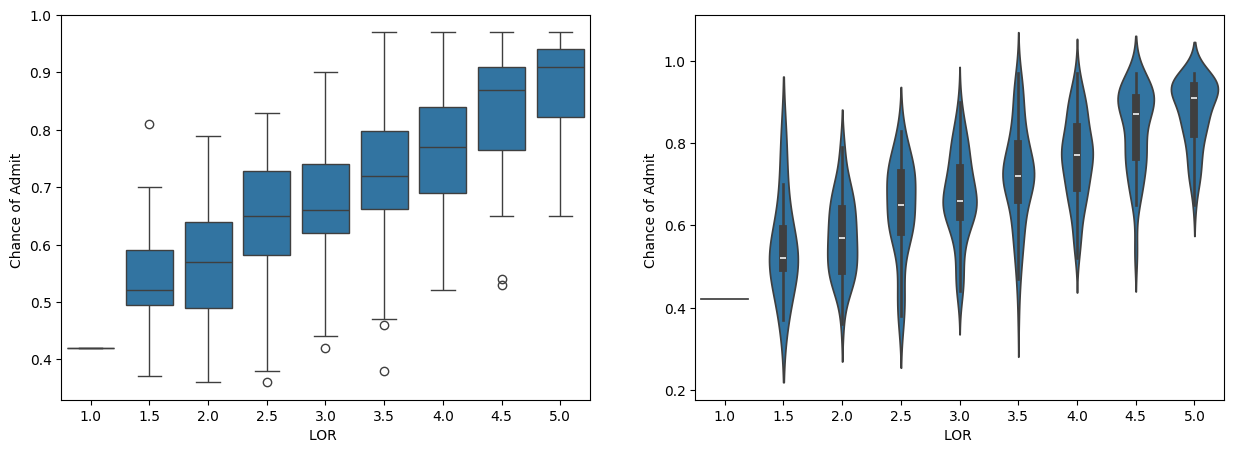

In [224]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.boxplot(x='LOR ', y='Chance of Admit ', data=df)
plt.subplot(1, 2, 2)
sns.violinplot(x='LOR ', y='Chance of Admit ', data=df);

- Higher LOR Ratings correspond to higher chances of admission.
- The distribution of the chance of admission is more spread out for lower LOR ratings.
- LOR ratings of 5.0 have the highest median chance of admission, followed by ratings of 4.0, 3.0, 2.0, and 1.0.
- There are more outliers in the lower LOR ratings, indicating more variability in the chance of admission.

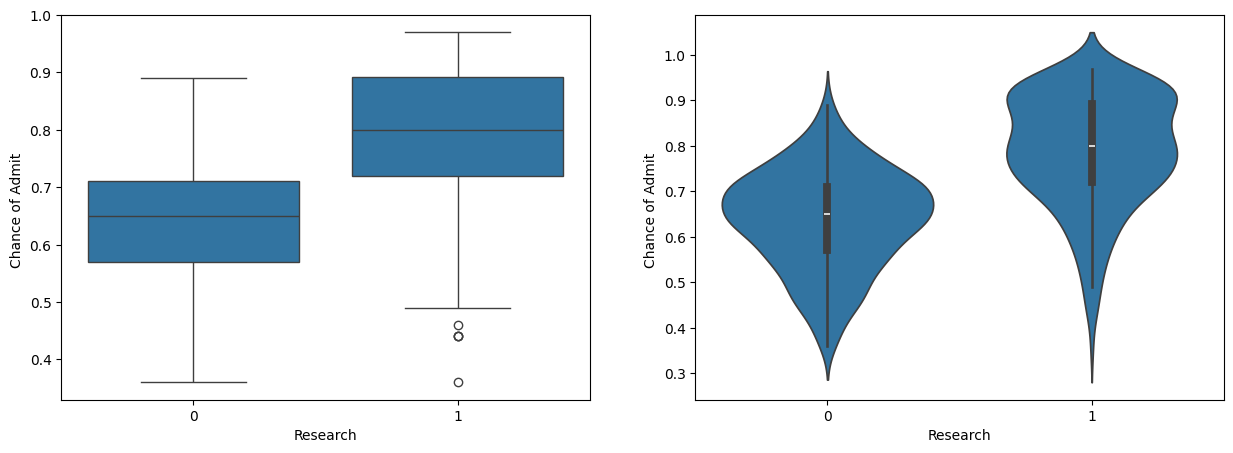

In [225]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.boxplot(x='Research', y='Chance of Admit ', data=df)
plt.subplot(1, 2, 2)
sns.violinplot(x='Research', y='Chance of Admit ', data=df);

- For applicants without research experience (Research = 0):
    - The median "Chance of Admit" is around 0.65.
    - The interquartile range (IQR) is approximately from 0.58 to 0.71.
    - There are a few outliers below 0.36.
    - The distribution is relatively symmetric with a peak around the median value. <br><br>

- For applicants with research experience (Research = 1):
    - The median "Chance of Admit" is around 0.8.
    - The IQR is approximately from 0.7 to 0.9.
    - There are a few outliers below 0.5.
    - The distribution is also relatively symmetric but shows a higher density around the median value compared to those without research experience.

# Correlation among features (except Target Variable) <br>
**Reason to exclude target variable:** Including the target variable in this correlation analysis would mix up the relationships between the target and features with relationships among the features themselves. The target variable should only be considered as the outcome of the model, not as a part of the feature set when analyzing correlations between the predictors.<br><br>
Also, it is better to use Spearman correlation method as we have ordinal data in the mix so ranking system suits better <br><br>
We should also remove features with high correlation (>0.90) because of Multicollinearity Issues and Overfitting Risk

In [226]:
df.drop('Chance of Admit ', axis=1).corr(method='spearman')

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
GRE Score,1.000000,0.821990,0.641390,0.623566,0.511288,0.828164,0.575781
TOEFL Score,0.821990,1.000000,0.643410,0.647852,0.520307,0.808203,0.470993
University Rating,0.641390,0.643410,1.000000,0.731633,0.600858,0.702114,0.432615
SOP,0.623566,0.647852,0.731633,1.000000,0.663275,0.719328,0.410042
LOR,0.511288,0.520307,0.600858,0.663275,1.000000,0.637411,0.373236
CGPA,0.828164,0.808203,0.702114,0.719328,0.637411,1.000000,0.506653
Research,0.575781,0.470993,0.432615,0.410042,0.373236,0.506653,1.000000


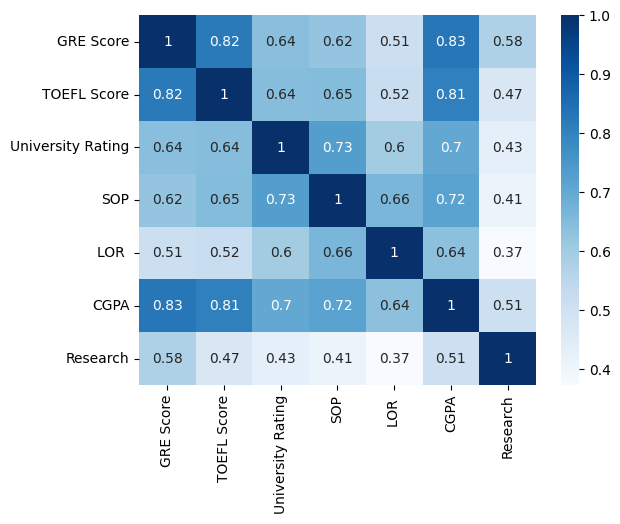

In [227]:
sns.heatmap(df.drop('Chance of Admit ', axis=1).corr(method='spearman'), annot= True, cmap='Blues');

- **Strongest Relationships:** GRE score, TOEFL score, and CGPA show very strong correlations, meaning that these features are highly predictive of each other and likely reflect overall academic performance.
- **University Rating:** The rating of a university is strongly related to test scores (GRE, TOEFL), SOP, and CGPA, but less strongly to research.
- **Research:** Research experience is moderately related to several features (GRE, TOEFL, CGPA), but has the weakest relationship with university rating, SOP, and LOR.
- **SOP and Letters of Recommendation:** Both SOP and LOR correlate moderately with academic performance metrics like GRE and CGPA, but LOR shows weaker correlation with research and other features.
- **Note:** As none of the correlation is crossing the benchmark so we can proceed without dropping any feature

# Preparation of data for modeling
We know there is one categorical column so generally we need to transform it for better performance but as there are only two categories so one will be max and other one will be min after transformation. Therefore no point of transforming

Need to Normalize data as ML model is bias towards high value so going to use Min-Max method but after the train-test split

In [228]:
from sklearn.model_selection import train_test_split

In [229]:
df_train, df_test = train_test_split(df, test_size=0.2, random_state=1)

In [232]:
from sklearn.preprocessing import MinMaxScaler

In [233]:
scaler = MinMaxScaler()

In [234]:
df_train = pd.DataFrame(scaler.fit_transform(df_train), columns=df_train.columns)
df_train.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,0.56,0.642857,0.00,0.375,0.571429,0.557692,1.0,0.508197
1,0.50,0.285714,0.00,0.250,0.285714,0.368590,0.0,0.360656
2,0.20,0.250000,0.00,0.500,0.142857,0.000000,1.0,0.000000
3,0.64,0.428571,0.50,0.625,0.714286,0.653846,1.0,0.688525
4,0.12,0.107143,0.25,0.500,0.142857,0.237179,1.0,0.131148


In [235]:
df_test = pd.DataFrame(scaler.fit_transform(df_test), columns=df_test.columns)
df_test.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,0.577778,0.576923,0.75,0.750,0.750,0.544444,1.0,0.490909
1,0.977778,0.846154,0.75,0.750,0.625,0.959259,1.0,0.981818
2,0.377778,0.538462,0.50,0.625,0.500,0.488889,0.0,0.490909
3,0.000000,0.269231,0.25,0.375,0.250,0.240741,0.0,0.490909
4,0.644444,0.653846,1.00,0.875,0.750,0.722222,1.0,0.872727


# Linear Regression model

In [236]:
import statsmodels.api as sm

In [237]:
x_train_scaled = df_train.drop(['Chance of Admit '], axis=1)
y_train_scaled = df_train['Chance of Admit ']

In [238]:
x_sm = sm.add_constant(x_train_scaled)  #Statmodels default is without intercept, to add intercept we need to add constant

In [239]:
x_sm

,const,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,1.0,0.56,0.642857,0.00,0.375,0.571429,0.557692,1.0
1,1.0,0.50,0.285714,0.00,0.250,0.285714,0.368590,0.0
2,1.0,0.20,0.250000,0.00,0.500,0.142857,0.000000,1.0
3,1.0,0.64,0.428571,0.50,0.625,0.714286,0.653846,1.0
4,1.0,0.12,0.107143,0.25,0.500,0.142857,0.237179,1.0
...,...,...,...,...,...,...,...,...
393,1.0,0.38,0.250000,0.50,0.750,0.714286,0.564103,0.0
394,1.0,0.62,0.678571,1.00,1.000,1.000000,0.849359,1.0
395,1.0,0.44,0.392857,0.50,0.625,0.714286,0.634615,0.0
396,1.0,0.70,0.714286,0.75,0.750,0.857143,0.759615,1.0


In [240]:
sm_model = sm.OLS(y_train_scaled, x_sm).fit()

In [241]:
print(sm_model.summary())

                            OLS Regression Results                            
Dep. Variable:       Chance of Admit    R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     263.1
Date:                Mon, 02 Dec 2024   Prob (F-statistic):          1.85e-143
Time:                        11:53:51   Log-Likelihood:                 369.00
No. Observations:                 398   AIC:                            -722.0
Df Residuals:                     390   BIC:                            -690.1
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0126      0.01

#### Analysis of the OLS Regression Results
- **Model Fit:**
    - **R-squared (0.822):** The model explains 82.2% of the variability in the target variable (Chance of Admit), which is a strong fit.
    - **Adjusted R-squared (0.818):** After accounting for the number of predictors, the model still explains 81.8% of the variability, indicating a robust model.
- **F-statistic and Prob(F-statistic):**
    - **F-statistic (257.7):** Indicates that the overall model is statistically significant.
    - **Prob(F-statistic) (2.10e-142):** The probability of observing such an F-statistic under the null hypothesis (that all coefficients are zero) is extremely low, affirming the model's significance.
- **Coefficients and Significance:**
    - **GRE Score (p = 0.002):** Significant positive relationship with Chance of Admit. A one-unit increase in GRE Score increases the admission chances by 0.1454 units on average.
    - **TOEFL Score (p = 0.002):** Significant positive relationship. A one-unit increase in TOEFL Score increases the admission chances by 0.1411 units on average.
    - **University Rating (p = 0.166):** Not significant at a 0.05 threshold, suggesting its relationship with admission chances is weak.
    - **SOP (p = 0.555):** Not significant, indicating that the Strength of Purpose does not strongly impact the model.
    - **LOR (p = 0.002):** Significant positive relationship. Strong recommendations increase admission chances by 0.0801 units on average.
    - **CGPA (p = 0.000):** Highly significant and has the largest positive effect. A one-unit increase in CGPA increases admission chances by 0.5780 units on average.
    - **Research (p = 0.008):** Significant positive impact. Having research experience increases admission chances by 0.0316 units on average.
- **Intercept (const):**
  - **p = 0.051:** Slightly above the significance threshold, suggesting that the baseline admission chance (when all other predictors are zero) is marginally significant.
- **Model Diagnostics:**
    - **Omnibus (80.594) and Jarque-Bera (167.116):** Indicate non-normality in residuals, which might suggest that some assumptions of linear regression are violated.
    - **Durbin-Watson (1.932):** Close to 2, indicating that there is no significant autocorrelation in the residuals.
    - **Condition Number (23.2):** Indicates that multicollinearity is not a severe issue.

#### Insights:
- **Key Predictors:**
    - The most impactful predictors are CGPA, GRE Score, and TOEFL Score, as they are highly significant and have large positive coefficients.
    - LOR and Research also significantly contribute to predicting admission chances, but their impact is smaller compared to CGPA.
- **Non-Significant Predictors:**
    - University Rating and SOP are not statistically significant at the 0.05 level. These features might not add much predictive power to the model and could be considered for removal in subsequent refinements.

In [242]:
x_train_scaled = df_train.drop(['Chance of Admit ', 'University Rating', 'LOR '], axis=1)

In [243]:
x_sm = sm.add_constant(x_train_scaled)

In [244]:
sm_model = sm.OLS(y_train_scaled, x_sm).fit()

In [245]:
print(sm_model.summary())

                            OLS Regression Results                            
Dep. Variable:       Chance of Admit    R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     348.1
Date:                Mon, 02 Dec 2024   Prob (F-statistic):          1.04e-141
Time:                        11:53:51   Log-Likelihood:                 358.89
No. Observations:                 398   AIC:                            -705.8
Df Residuals:                     392   BIC:                            -681.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0123      0.016     -0.764      

#### Analysis of the Updated OLS Regression Results:
- **Adjusted 𝑅2:**
  - The adjusted 𝑅2 value is 0.814, indicating that 81.4% of the variance in the dependent variable (Chance of Admit) is explained by the independent variables in the model. This suggests a strong fit.
- **Coefficients:**
  - The coefficients represent the relationship between each independent variable and the dependent variable:
- **GRE Score:**
  - A 1-point increase in GRE Score increases the Chance of Admit by 0.1478 on average, holding other variables constant.
- **TOEFL Score:**
  - A 1-point increase in TOEFL Score increases the Chance of Admit by 0.1410.
- **SOP:**
  - A 1-point increase in SOP rating increases the Chance of Admit by 0.0894.
- **CGPA:**
  CGPA has the strongest effect, with a 1-point increase leading to a 0.6591 increase in Chance of Admit.
- **Research:**
  - Having research experience increases the Chance of Admit by 0.0393 on average.
- **P-Values:**
  - All variables have p-values less than 0.05, indicating they are statistically significant contributors to the model. The exception is the constant term, which has a p-value of 0.445 (not significant), but this does not impact the interpretability of the model.
- **F-Statistic:**
  - The F-statistic value of 348.1 and the associated p-value (1.04e-141) confirm that the overall model is statistically significant.
- **Durbin-Watson:**
  - The Durbin-Watson statistic is 1.921, close to 2, suggesting there is minimal autocorrelation in the residuals.
- **Omnibus and Jarque-Bera Tests:**
  - Both tests indicate that the residuals deviate from normality, as evidenced by the low p-values. However, this might not critically impact the linear regression's predictive performance unless extreme non-normality is observed.
- **Condition Number:**
  - The condition number is 20.0, which is reasonable and suggests no significant multicollinearity issues.

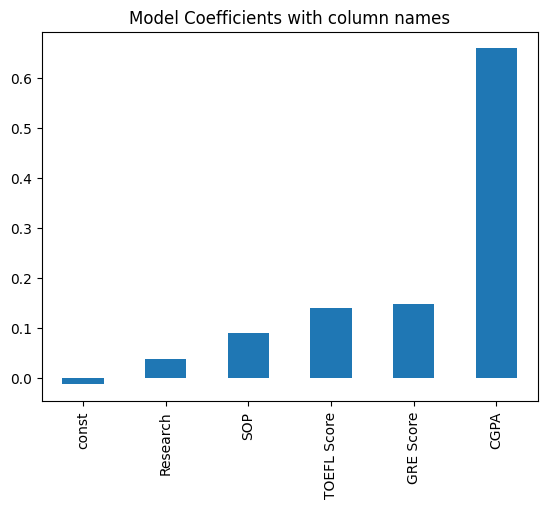

In [246]:
sm_model.params.sort_values().plot(kind='bar')
plt.title('Model Coefficients with column names');

- **Academic Performance:** CGPA, TOEFL, and GRE scores are the top predictors, highlighting the importance of strong academic performance in the model's predictions.
- **Research Experience:** Although not as influential as academic scores, having research experience still positively impacts the outcome.
- **SOP:** A well-crafted Statement of Purpose can moderately influence the predictions, indicating its role in the overall evaluation process.

# Testing of Assumptions of Linear Regression

In [247]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [248]:
def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data['Feature'] = X.columns
    vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data

In [276]:
x_train_scaled.head()

,GRE Score,TOEFL Score,SOP,CGPA,Research
0,0.56,0.642857,0.375,0.557692,1.0
1,0.50,0.285714,0.250,0.368590,0.0
2,0.20,0.250000,0.500,0.000000,1.0
3,0.64,0.428571,0.625,0.653846,1.0
4,0.12,0.107143,0.500,0.237179,1.0


#### Linear relationship between independent & dependent variables

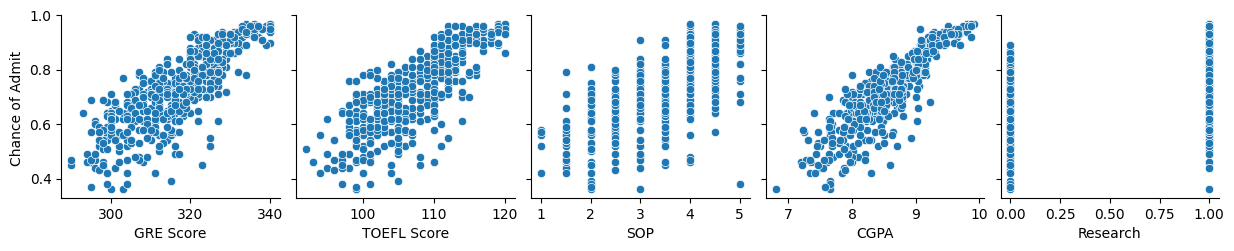

In [253]:
sns.pairplot(df, x_vars=['GRE Score', 'TOEFL Score', 'SOP', 'CGPA', 'Research'], y_vars='Chance of Admit ', kind='scatter');

#### Key Relationships
- GRE Score: There is a positive correlation between GRE scores and the chance of admission. As GRE scores increase, the likelihood of admission also tends to rise.
- TOEFL Score: Similar to GRE scores, higher TOEFL scores are associated with a higher chance of admission.
- CGPA: This variable shows a strong positive correlation with the chance of admission. Higher CGPA values significantly increase the likelihood of being admitted.
- Research: Having research experience (binary variable: 0 or 1) positively impacts the chance of admission. Applicants with research experience have a higher probability of being admitted.
- SOP (Statement of Purpose): The relationship between SOP scores and the chance of admission is less clear, with a more scattered distribution. However, higher SOP scores generally indicate a better chance of admission.
#### Insights
- Academic Performance: GRE, TOEFL, and CGPA are strong predictors of admission chances, emphasizing the importance of academic excellence.
- Research Experience: Having research experience adds value to the application and increases the likelihood of admission.
- SOP: While not as strong a predictor as the other variables, a well-crafted SOP can still positively influence admission chances.

#### Model 1

In [339]:
vif=calculate_vif(x_train_scaled).sort_values(by=['VIF'], ascending=False)
vif

,Feature,VIF
3,CGPA,33.939999
0,GRE Score,28.593450
1,TOEFL Score,28.165584
2,SOP,13.441324
4,Research,3.421051


In [340]:
x_sm = sm.add_constant(x_train_scaled)
sm_model1 = sm.OLS(y_train_scaled, x_sm).fit()
print(sm_model1.summary())

                            OLS Regression Results                            
Dep. Variable:       Chance of Admit    R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     348.1
Date:                Mon, 02 Dec 2024   Prob (F-statistic):          1.04e-141
Time:                        12:43:29   Log-Likelihood:                 358.89
No. Observations:                 398   AIC:                            -705.8
Df Residuals:                     392   BIC:                            -681.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0123      0.016     -0.764      

In [341]:
residuals=(y_train_scaled-sm_model1.predict(x_sm))
residuals.mean()

-9.149576685353049e-17

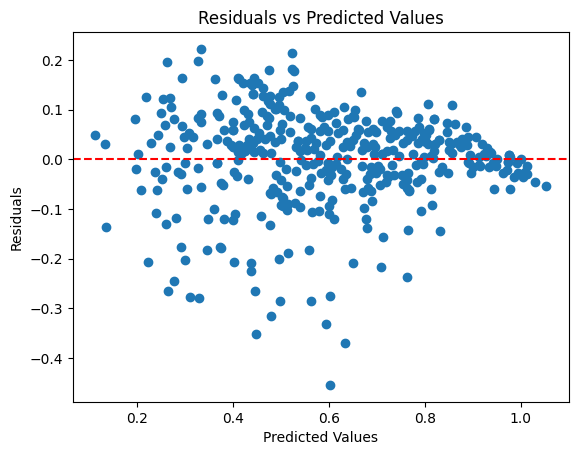

In [342]:
# Scatter plot of residuals vs predicted values
predicted = sm_model1.predict(x_sm)
plt.scatter(predicted, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()

In [343]:
# Goldfeld-Quandt test
from statsmodels.stats.diagnostic import het_goldfeldquandt
gq_test = het_goldfeldquandt(residuals, x_sm)
print("Goldfeld-Quandt test p-value:", gq_test[1])

Goldfeld-Quandt test p-value: 0.8188390443239849


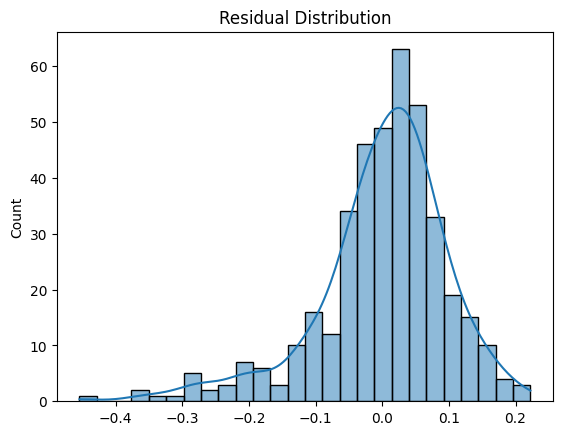

In [344]:
# Histogram of residuals
sns.histplot(residuals, kde=True)
plt.title("Residual Distribution")
plt.show()

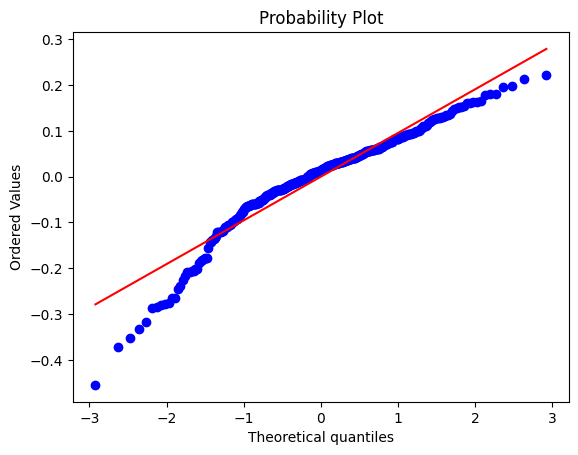

In [345]:
# Q-Q plot
from scipy.stats import probplot
probplot(residuals, dist="norm", plot=plt)
plt.show()

#### Model 2

In [346]:
col = vif["Feature"][1:].values
x_train_vif=pd.DataFrame(x_train_scaled, columns=x_train_scaled.columns)[col]
vif=calculate_vif(x_train_vif).sort_values(by=['VIF'], ascending=False)
vif

,Feature,VIF
1,TOEFL Score,25.032541
0,GRE Score,23.471894
2,SOP,10.274534
3,Research,3.420659


In [347]:
x_sm_vif=sm.add_constant(x_train_vif)
sm_model = sm.OLS(list(y_train), x_sm_vif).fit()
print(sm_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.742
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     283.1
Date:                Mon, 02 Dec 2024   Prob (F-statistic):          2.67e-114
Time:                        12:44:36   Log-Likelihood:                 488.46
No. Observations:                 398   AIC:                            -966.9
Df Residuals:                     393   BIC:                            -947.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.4025      0.011     38.083      

In [348]:
residuals=(y_train_scaled-sm_model.predict(x_sm_vif))
residuals.mean()

-0.12808509761924375

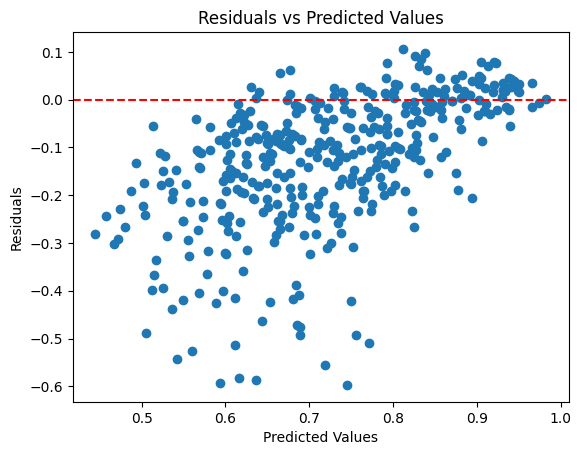

In [349]:
# Scatter plot of residuals vs predicted values
predicted = sm_model.predict(x_sm_vif)
plt.scatter(predicted, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()

In [350]:
# Goldfeld-Quandt test
from statsmodels.stats.diagnostic import het_goldfeldquandt
gq_test = het_goldfeldquandt(residuals, x_sm_vif)
print("Goldfeld-Quandt test p-value:", gq_test[1])

Goldfeld-Quandt test p-value: 0.9759976892257453


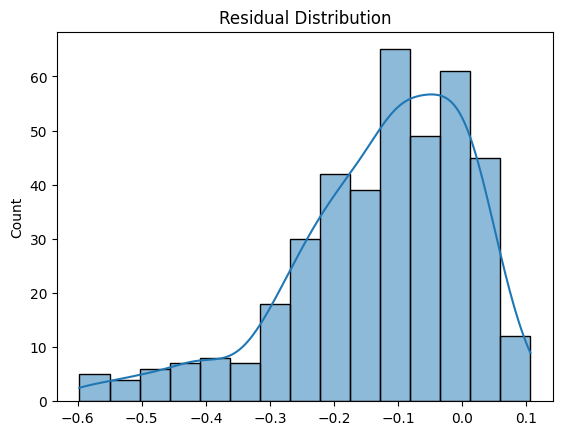

In [351]:
# Histogram of residuals
sns.histplot(residuals, kde=True)
plt.title("Residual Distribution")
plt.show()

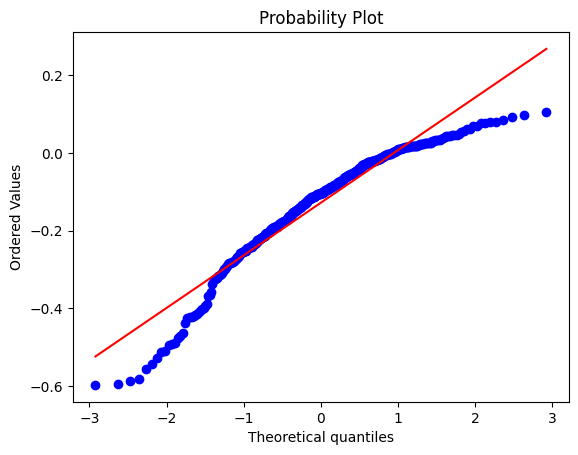

In [352]:
# Q-Q plot
from scipy.stats import probplot
probplot(residuals, dist="norm", plot=plt)
plt.show()

#### Model 3

In [353]:
col = vif["Feature"][1:].values
x_train_vif=pd.DataFrame(x_train_scaled, columns=x_train_scaled.columns)[col]
vif=calculate_vif(x_train_vif).sort_values(by=['VIF'], ascending=False)
vif

,Feature,VIF
0,GRE Score,10.274815
1,SOP,8.230225
2,Research,3.407607


In [354]:
x_sm_vif_final=sm.add_constant(x_train_vif)
sm_model_final = sm.OLS(list(y_train), x_sm_vif_final).fit()
print(sm_model_final.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.718
Method:                 Least Squares   F-statistic:                     338.7
Date:                Mon, 02 Dec 2024   Prob (F-statistic):          1.09e-108
Time:                        12:45:23   Log-Likelihood:                 472.32
No. Observations:                 398   AIC:                            -936.6
Df Residuals:                     394   BIC:                            -920.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4155      0.011     38.676      0.0

In [355]:
residuals=(y_train_scaled-sm_model_final.predict(x_sm_vif_final))
residuals.mean()

-0.128085097619244

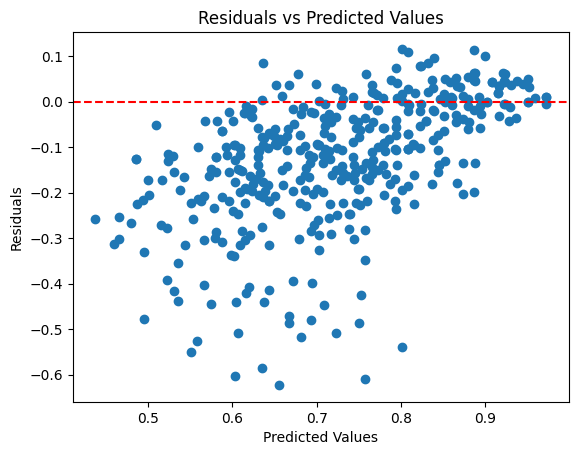

In [356]:
# Scatter plot of residuals vs predicted values
predicted = sm_model_final.predict(x_sm_vif_final)
plt.scatter(predicted, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()

In [357]:
# Goldfeld-Quandt test
from statsmodels.stats.diagnostic import het_goldfeldquandt
gq_test = het_goldfeldquandt(residuals, x_sm_vif_final)
print("Goldfeld-Quandt test p-value:", gq_test[1])

Goldfeld-Quandt test p-value: 0.971732032136658


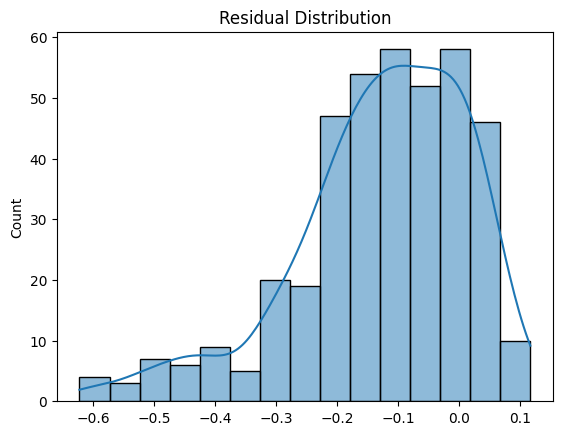

In [358]:
# Histogram of residuals
sns.histplot(residuals, kde=True)
plt.title("Residual Distribution")
plt.show()

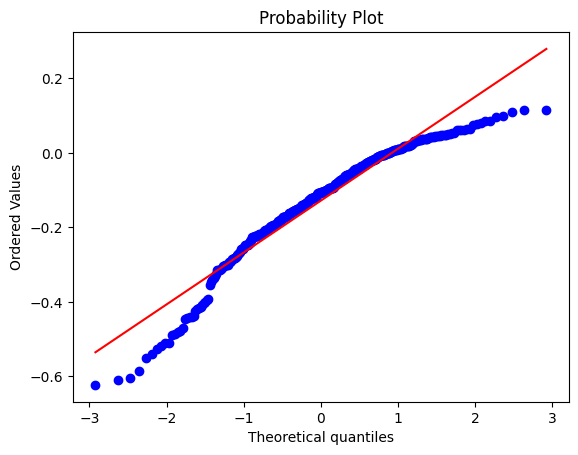

In [359]:
# Q-Q plot
from scipy.stats import probplot
probplot(residuals, dist="norm", plot=plt)
plt.show()

#### Model 4

In [360]:
col = vif["Feature"][1:].values
x_train_vif=pd.DataFrame(x_train_scaled, columns=x_train_scaled.columns)[col]
vif=calculate_vif(x_train_vif).sort_values(by=['VIF'], ascending=False)
vif

,Feature,VIF
0,SOP,2.72446
1,Research,2.72446


In [361]:
x_sm_vif=sm.add_constant(x_train_vif)
sm_model_next = sm.OLS(list(y_train), x_sm_vif).fit()
print(sm_model_next.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.554
Method:                 Least Squares   F-statistic:                     247.4
Date:                Mon, 02 Dec 2024   Prob (F-statistic):           2.17e-70
Time:                        12:45:47   Log-Likelihood:                 380.19
No. Observations:                 398   AIC:                            -754.4
Df Residuals:                     395   BIC:                            -742.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4869      0.012     40.028      0.0

In [362]:
residuals=(y_train_scaled-sm_model_next.predict(x_sm_vif))
residuals.mean()

-0.12808509761924336

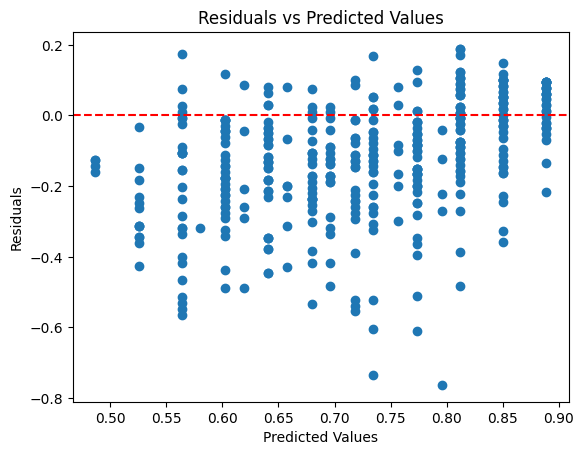

In [363]:
# Scatter plot of residuals vs predicted values
predicted = sm_model_next.predict(x_sm_vif)
plt.scatter(predicted, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()

In [364]:
# Goldfeld-Quandt test
from statsmodels.stats.diagnostic import het_goldfeldquandt
gq_test = het_goldfeldquandt(residuals, x_sm_vif)
print("Goldfeld-Quandt test p-value:", gq_test[1])

Goldfeld-Quandt test p-value: 0.9891432427164347


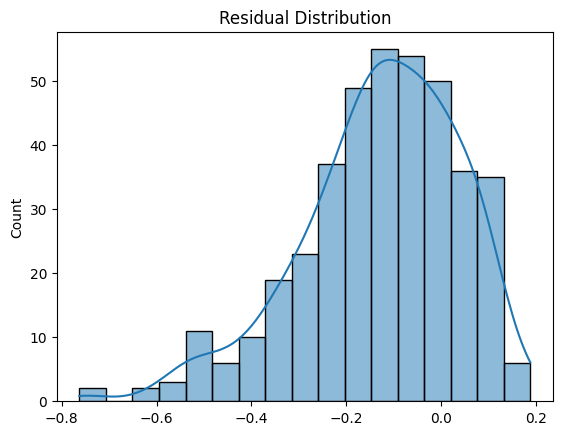

In [365]:
# Histogram of residuals
sns.histplot(residuals, kde=True)
plt.title("Residual Distribution")
plt.show()

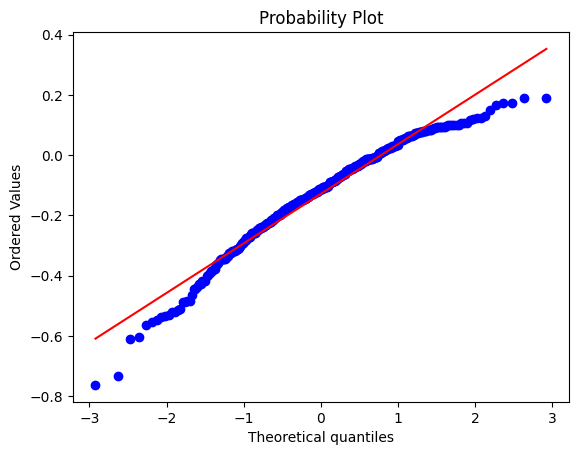

In [366]:
# Q-Q plot
from scipy.stats import probplot
probplot(residuals, dist="norm", plot=plt)
plt.show()

### Linear Regression Model Comparison

#### Key Metrics and Analysis

- **Adjusted R-Squared (Adj. \( R^2 \)):**
  - **Model 1**: Adj. R² = 0.814, the highest among all models. This indicates that Model 1 explains the largest proportion of the variance in the dependent variable while adjusting for the number of predictors.
  - **Model 2**: Adj. R² = 0.740, lower than Model 1.
  - **Model 3**: Adj. R² = 0.718, further reduction in explanatory power.
  - **Model 4**: Adj. R² = 0.554, the weakest performance.
- **Residual Mean:**
  - **Model 1**: Residual mean is closest to zero (-9.15 × 10⁻¹⁷), indicating minimal bias in predictions.
  - **Model 2, 3, 4**: Residual means are larger (-0.128), showing a systematic bias in predictions.

- **VIF Scores:**
  - **Model 1**: High VIF values for CGPA, GRE Score, TOEFL Score, and SOP indicate multicollinearity but do not affect the model's strong performance.
  - **Model 2 and 3**: VIF values are slightly reduced but still above the threshold (5), with a drop in Adj. R².
  - **Model 4**: VIF values are well below 5, but explanatory power is significantly reduced due to the removal of key predictors.

- **Goldfeld-Quandt Test:**
  - All models satisfy the assumption of homoscedasticity (p-values > 0.05), so this is not a differentiating factor.

- **Normality of Residuals:**
  - **Model 1**: Residuals exhibit a bell-shaped curve in the histogram, indicating a closer approximation to normality. The Q-Q plot shows deviation in the left tail but overall performs better than other models.
  - **Model 2, 3, 4**: Residuals deviate more noticeably from normality, with heavy clustering on the lower side of the zero line in the scatterplots.

- **Residual Scatterplot Analysis:**
  - **Model 1**: Residuals are more evenly distributed around the zero line, suggesting better predictive performance.
  - **Model 2, 3, 4**: Residuals show clustering on the lower side of zero or patterns that hint at potential issues like non-linearity or omitted variable bias.

---

#### Final Insights
- **Model 1** achieves the best balance between predictive power (Adj. R²), residual mean, and residual behavior.
- Although multicollinearity exists in Model 1, its impact on prediction is minimal. The high Adj. R² and near-zero residual mean indicate that the model effectively captures the relationships between the independent and dependent variables.
- Removing features to reduce VIF scores (as in Models 2, 3, and 4) results in a notable loss of predictive power without significant gains in model assumptions.


# Model Application and Evaluation on test data

In [368]:
df_test

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,0.577778,0.576923,0.75,0.750,0.750,0.544444,1.0,0.490909
1,0.977778,0.846154,0.75,0.750,0.625,0.959259,1.0,0.981818
2,0.377778,0.538462,0.50,0.625,0.500,0.488889,0.0,0.490909
3,0.000000,0.269231,0.25,0.375,0.250,0.240741,0.0,0.490909
4,0.644444,0.653846,1.00,0.875,0.750,0.722222,1.0,0.872727
...,...,...,...,...,...,...,...,...
95,0.355556,0.269231,0.25,0.375,0.625,0.418519,1.0,0.509091
96,0.133333,0.115385,0.25,0.500,0.500,0.248148,1.0,0.036364
97,0.177778,0.230769,0.25,0.500,0.625,0.314815,1.0,0.400000
98,0.488889,0.384615,0.25,0.875,0.750,0.466667,0.0,0.272727


In [369]:
x_test_scaled = df_test.drop(['Chance of Admit ', 'University Rating', 'LOR '], axis=1)
y_test_scaled = df_test['Chance of Admit ']
x_test_scaled, y_test_scaled

(    GRE Score  TOEFL Score    SOP      CGPA  Research
 0    0.577778     0.576923  0.750  0.544444       1.0
 1    0.977778     0.846154  0.750  0.959259       1.0
 2    0.377778     0.538462  0.625  0.488889       0.0
 3    0.000000     0.269231  0.375  0.240741       0.0
 4    0.644444     0.653846  0.875  0.722222       1.0
 ..        ...          ...    ...       ...       ...
 95   0.355556     0.269231  0.375  0.418519       1.0
 96   0.133333     0.115385  0.500  0.248148       1.0
 97   0.177778     0.230769  0.500  0.314815       1.0
 98   0.488889     0.384615  0.875  0.466667       0.0
 99   0.133333     0.384615  0.625  0.337037       1.0
 
 [100 rows x 5 columns],
 0     0.490909
 1     0.981818
 2     0.490909
 3     0.490909
 4     0.872727
         ...   
 95    0.509091
 96    0.036364
 97    0.400000
 98    0.272727
 99    0.472727
 Name: Chance of Admit , Length: 100, dtype: float64)

In [370]:
x_test_sm = sm.add_constant(x_test_scaled)
x_test_sm

,const,GRE Score,TOEFL Score,SOP,CGPA,Research
0,1.0,0.577778,0.576923,0.750,0.544444,1.0
1,1.0,0.977778,0.846154,0.750,0.959259,1.0
2,1.0,0.377778,0.538462,0.625,0.488889,0.0
3,1.0,0.000000,0.269231,0.375,0.240741,0.0
4,1.0,0.644444,0.653846,0.875,0.722222,1.0
...,...,...,...,...,...,...
95,1.0,0.355556,0.269231,0.375,0.418519,1.0
96,1.0,0.133333,0.115385,0.500,0.248148,1.0
97,1.0,0.177778,0.230769,0.500,0.314815,1.0
98,1.0,0.488889,0.384615,0.875,0.466667,0.0


In [371]:
y_test_pred = sm_model1.predict(x_test_sm)
y_test_pred

,0
0,0.619663
1,0.990135
2,0.497575
3,0.217887
4,0.768706
...,...
95,0.426922
96,0.271275
97,0.338051
98,0.500005


In [376]:
from sklearn.metrics import mean_squared_error, r2_score

In [378]:
mae = np.mean(np.abs(y_test_scaled - y_test_pred))
rmse = np.sqrt(mean_squared_error(y_test_scaled, y_test_pred))
r2 = r2_score(y_test_scaled, y_test_pred)
adj_r2 = 1 - ((1 - r2) * ((len(y_test_scaled)) - 1)) / ((len(y_test_scaled)) - (x_test_sm.shape[1] - 1) - 1)

print(f"""
Model Evaluation Metrics:
-------------------------
Mean Absolute Error (MAE): {mae:.4f}
Root Mean Square Error (RMSE): {rmse:.4f}
R2 Score: {r2:.4f}
Adjusted R2 Score: {adj_r2:.4f}
""")


Model Evaluation Metrics:
-------------------------
Mean Absolute Error (MAE): 0.0750
Root Mean Square Error (RMSE): 0.1079
R2 Score: 0.8124
Adjusted R2 Score: 0.8024



#### Model Performance Overview:
- **Mean Absolute Error (MAE): 0.0750**
  - The MAE indicates that, on average, the model's predictions are off by approximately 0.075 units of the "Chance of Admit." This is relatively low and suggests that the model is performing well in terms of prediction accuracy.
- **Root Mean Square Error (RMSE): 0.1079**
  - RMSE penalizes large errors more heavily than MAE, indicating that while the model is performing decently, there might be some outliers where predictions are significantly off. The RMSE value is still reasonable and confirms that the model's predictions are fairly accurate.
- **R2 Score: 0.8124**
  - The R-squared value of 0.8124 suggests that about 81% of the variance in the "Chance of Admit" can be explained by the model. This is a strong indicator that the model is a good fit for the data and explains most of the variability in the outcome.
- **Adjusted R2 Score: 0.8024**
  - The adjusted R-squared value is slightly lower than the R2 score, which is expected since it accounts for the number of predictors used in the model. The adjusted R2 value of 0.8024 is still very high, reinforcing that the model is appropriate and not overfitting.

# Actionable Insights and Recommendations

## Key Predictors of Admission Success:

### 1. CGPA
From my analysis, CGPA emerges as the most significant predictor of admission success, with a strong positive relationship to the likelihood of admission. Applicants with higher CGPAs tend to have better chances of being admitted. Given that CGPA has the largest effect on the target variable, I believe it should be emphasized as one of the most critical factors in admission decisions.

**Recommendation:**  
I recommend that students with lower CGPAs focus on improving their academic performance or supplement their application with strong SOPs, LORs, and research experience to boost their admission chances.

### 2. GRE and TOEFL Scores
Both GRE and TOEFL scores show a significant positive relationship with admission success, though their impact is slightly less than CGPA. Higher GRE and TOEFL scores tend to increase the likelihood of admission.

**Recommendation:**  
I suggest applicants aim for competitive GRE (above 320) and TOEFL scores (above 105) to improve their chances of admission. These scores should be highlighted during application guidance and targeted marketing campaigns aimed at prospective students.

### 3. LOR (Letter of Recommendation)
LORs are another important predictor, though their effect is smaller compared to CGPA, GRE, and TOEFL scores. Strong recommendations play a critical role in differentiating applicants, especially those with similar academic profiles.

**Recommendation:**  
I recommend that students invest time in building strong relationships with professors or mentors to secure high-quality LORs. Educational institutions can offer workshops on crafting effective LOR requests to help students strengthen this component of their applications.

### 4. Research Experience
Research experience is also positively correlated with admission success, especially for applicants to highly competitive universities. This factor is especially important for those applying to top-tier programs.

**Recommendation:**  
I encourage students to gain research experience, particularly if they are applying to highly competitive programs. Institutions can help by providing research opportunities or internships to bolster student profiles.

---

## Non-Significant Predictors:

### 1. University Rating
Although university rating is correlated with other factors (such as test scores), it is not statistically significant in predicting admission success at the 0.05 significance level. This suggests that other factors like GRE, TOEFL, and CGPA have a more direct impact on admission decisions.

**Recommendation:**  
Based on my analysis, university rating could potentially be removed as a predictor in future models unless it is found to be significantly correlated with other impactful features.

### 2. SOP (Statement of Purpose)
While a strong SOP is still important, its impact on admission chances is not statistically significant in the model. It seems that other factors may have more influence, or perhaps applicants are already submitting high-quality SOPs in general.

**Recommendation:**  
I recommend that we continue emphasizing the importance of SOPs in the application process but consider providing more targeted advice or examples to help applicants improve their SOPs in future analyses.

---

## Strategic Recommendations for the Company:

### 1. Predictive Tool Development
Leveraging the insights from my model, I suggest we create a predictive admission tool on our website. This would allow prospective students to input their academic details and scores, providing them with a personalized estimate of their chances of admission, thereby helping them make more informed decisions.

**Recommendation:**  
This model can be used for a student advisory service that provides personalized feedback, which could drive greater user engagement and satisfaction.

### 2. Targeted Admissions Campaigns
Based on the strong predictors (GRE, TOEFL, CGPA), I recommend running targeted campaigns that focus on helping students improve their application profiles. For instance, offering GRE prep courses, TOEFL training, or academic tutoring could be a highly effective strategy to improve applicants' competitiveness.

**Recommendation:**  
We should tailor our marketing campaigns to students who fall short of competitive scores (e.g., offering discounts on prep courses to applicants with TOEFL < 100 or GRE < 300).

### 3. Research Emphasis
I believe that gaining research experience can provide a significant edge for students with average academic scores, especially when applying to top-tier programs.

**Recommendation:**  
We should create a network of research internships and opportunities, integrating them into our application counseling process to help students enhance their profiles.

---

## Student Strategy and Preparation:

### 1. Focused Improvement Areas
Based on my analysis, I recommend that students concentrate on improving the areas that most influence their admission chances. For those with low GRE or TOEFL scores, addressing these areas will likely offer the highest return on investment.

**Recommendation:**  
We should offer students tailored improvement plans that focus on their specific weak areas, whether it be test scores, SOP quality, or research experience.

### 2. Clear Insights for Students
It’s important to provide students with a clear understanding of how their profile features (such as CGPA, GRE, TOEFL) impact their admission chances. This will help them set realistic expectations and take actionable steps to strengthen their applications.

**Recommendation:**  
I recommend creating a student-facing dashboard or report that visualizes how different factors (e.g., GRE score, research experience) affect their chances of admission and provides specific recommendations for improvement.

---

## Potential Future Work:

### 1. Model Refinement
I plan to continuously collect and analyze new data to refine the predictive model. Factors like University Rating, SOP, and LOR could be reconsidered in future iterations to see if they become more relevant over time.

### 2. Feature Engineering
In the future, I would experiment with new feature combinations, such as interaction terms between CGPA and GRE scores, or weighted averages of test scores, to assess if they offer additional predictive power.

### 3. Exploring Non-Linear Relationships
I would consider using machine learning techniques such as decision trees or random forests to capture non-linear relationships between features, which could offer deeper insights compared to traditional linear regression.

---

By applying these insights, both the company and students can take actionable steps to improve their chances in graduate school admissions and optimize the application process.
